In [155]:
# Importacao das bibliotecas e packages
import imageio
import numpy as np
import matplotlib.pyplot as plt
import math

In [156]:
# funcao que carrega a imagem
def load_img(imgPath):
    """
    Receive a image path and return a numpy array with with type np.uint8.
    """

    # leitura inicial da imagem
    imgRaw = imageio.imread(imgPath)
    
    # type(imgRaw) -->  <class 'imageio.core.util.Array'>
    
    
    img2 = np.zeros(imgRaw.shape, dtype=np.uint8)
    
    # tipo do img2 -->  <class 'numpy.ndarray'>
    # tipo do img2[0,0,0] --> <class 'numpy.uint8'>

    for x in range(imgRaw.shape[0]):
        for y in range(imgRaw.shape[1]):
            img2[x,y] = imgRaw[x,y]
    
    return img2

In [157]:
# leitura do path da imagem

# instrucao para o usuario do que ele deve digitar
print ("Forneça o Path da imagem")

# exemplos que funcionam para facilitar a execucao
print ("Exemplos válidos: ")
print ("../images/raw/anime_girl.png")
print ("../images/raw/grayscale_selfie.png")

# leitura de string
imgPath = input().rstrip()

# chamada de funcao que carrega imagem
imgRaw = load_img(imgPath)

Forneça o Path da imagem
Exemplos válidos: 
../images/raw/anime_girl.png
../images/raw/grayscale_selfie.png
../images/raw/oriental_selfie.jpg


7360 4912
1000 667


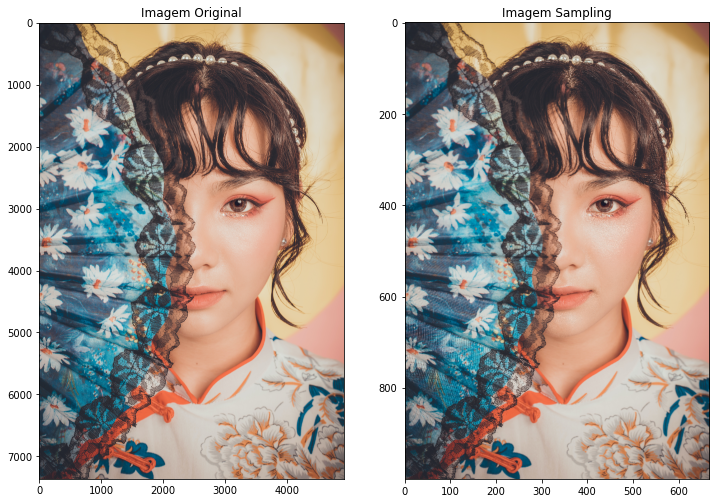

In [160]:
# caso alguma das dimensoes da imagem seja maior do que maxSize
# reduz as dimensoes da imagem
def sampling (img, maxSize = 1000):
    
    # armazenando as dimensoes da imagem
    shapeN = img.shape[0]
    shapeM = img.shape[1]
    comp = img.shape[2]
    
    if shapeN <= maxSize and shapeM <= maxSize:
        # se as dimensoes da imagem já são menores do que maxSize
        # retorna a imagem, sem fazer alteracoes
        return img
    
    # se o lado maior eh N (formato retrato)
    if shapeN > shapeM:
        # descobrindo a dimensao da nova imagem
        newN = maxSize
        newM = math.floor(newN / shapeN * shapeM)
    # se o lado maior eh M (formato paisagem)
    else:
        # descobrindo a dimensao da nova imagem
        newM = maxSize
        newN = math.floor(newM / shapeM * shapeN)
        
    # Criacao da imagem amostrada (sampling) de tamanho newN x newM 
    imgSamp = np.zeros((newN,newM,comp)).astype(np.uint8)


    # preenchimento da nova imagem
    step = shapeN/float(newN)
    for x in range(newN):
        for y in range(newM):
            imgSamp[x,y] = img[math.floor(x*step),math.floor(y*step)]
    
    return imgSamp


# chamada de funcao
imgNew = sampling(imgRaw)

plt.figure(figsize = (12,12))

plt.subplot(121)
plt.imshow(imgRaw);plt.title("Imagem Original")

# exibicao da imagem
plt.subplot(122)
plt.imshow(imgNew);plt.title("Imagem Sampling")

# exibicao das dimensoes da imagem original
print (imgRaw.shape[0], imgRaw.shape[1])

# exibicao das dimensoes da imagem apos o sampling
print (imgNew.shape[0], imgNew.shape[1])